Python para Finanças - Risco de Ações


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Importação base de dados

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/acoes.csv')
df.head()

,Date,ABEV,ODPV,CCR,PETBR,BB,BOVA
0,2015-01-02,16.020000,9.37,14.72,9.36,22.650000,47.259998
1,2015-01-05,15.730000,9.62,14.30,8.56,22.180000,46.320000
2,2015-01-06,16.330000,9.55,14.51,8.28,22.490000,46.580002
3,2015-01-07,16.559999,9.69,15.60,8.67,23.480000,48.150002
4,2015-01-08,16.540001,9.66,15.78,9.23,23.559999,48.509998


Calculo do risco médio anual da carteira

In [6]:
df.drop(labels = ['Date'], axis=1, inplace=True)
df

,ABEV,ODPV,CCR,PETBR,BB,BOVA
0,16.020000,9.37,14.72,9.360000,22.650000,47.259998
1,15.730000,9.62,14.30,8.560000,22.180000,46.320000
2,16.330000,9.55,14.51,8.280000,22.490000,46.580002
3,16.559999,9.69,15.60,8.670000,23.480000,48.150002
4,16.540001,9.66,15.78,9.230000,23.559999,48.509998
...,...,...,...,...,...,...
1915,15.300000,9.33,13.55,31.059999,39.849998,106.110001
1916,15.270000,9.10,13.55,30.780001,39.400002,105.599998
1917,15.470000,9.23,13.81,31.270000,40.180000,108.220001
1918,15.760000,9.39,13.70,31.090000,40.790001,108.849998


Taxas de retorno

In [8]:
taxas_retorno = (df/df.shift(1)) - 1
taxas_retorno*100

,ABEV,ODPV,CCR,PETBR,BB,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.810243,2.668090,-2.853261,-8.547001,-2.075052,-1.988994
2,3.814370,-0.727648,1.468532,-3.271036,1.397653,0.561317
3,1.408448,1.465962,7.512062,4.710149,4.401955,3.370545
4,-0.120764,-0.309595,1.153842,6.459048,0.340715,0.747657
...,...,...,...,...,...,...
1915,-0.520156,0.538795,-1.597678,-0.192806,-1.018380,-0.599531
1916,-0.196077,-2.465161,0.000000,-0.901477,-1.129227,-0.480635
1917,1.309756,1.428562,1.918821,1.591942,1.979692,2.481063
1918,1.874596,1.733487,-0.796529,-0.575633,1.518170,0.582145


Desvio-Padrão das taxas de retorno

In [9]:
taxas_retorno.std() * 100

ABEV     1.744508
ODPV     1.999788
CCR      2.591980
PETBR    3.231462
BB       2.771237
BOVA     1.635500
dtype: float64

In [10]:
#Taxa anualizada 

taxas_retorno.std() * math.sqrt(246)

ABEV     0.273615
ODPV     0.313654
CCR      0.406536
PETBR    0.506835
BB       0.434652
BOVA     0.256518
dtype: float64

Covariancia e correlação entre as taxas de retorno

In [11]:
taxas_retorno.cov()

,ABEV,ODPV,CCR,PETBR,BB,BOVA
ABEV,0.000304,0.000068,0.000175,0.000199,0.000195,0.000160
ODPV,0.000068,0.000400,0.000162,0.000159,0.000146,0.000119
CCR,0.000175,0.000162,0.000672,0.000401,0.000408,0.000283
PETBR,0.000199,0.000159,0.000401,0.001044,0.000568,0.000394
BB,0.000195,0.000146,0.000408,0.000568,0.000768,0.000353
BOVA,0.000160,0.000119,0.000283,0.000394,0.000353,0.000267


In [12]:
taxas_retorno.corr()

,ABEV,ODPV,CCR,PETBR,BB,BOVA
ABEV,1.000000,0.195933,0.387331,0.352406,0.402956,0.561800
ODPV,0.195933,1.000000,0.312051,0.246583,0.264072,0.362670
CCR,0.387331,0.312051,1.000000,0.479247,0.568531,0.667063
PETBR,0.352406,0.246583,0.479247,1.000000,0.634282,0.745452
BB,0.402956,0.264072,0.568531,0.634282,1.000000,0.779900
BOVA,0.561800,0.362670,0.667063,0.745452,0.779900,1.000000


Matriz de correlação

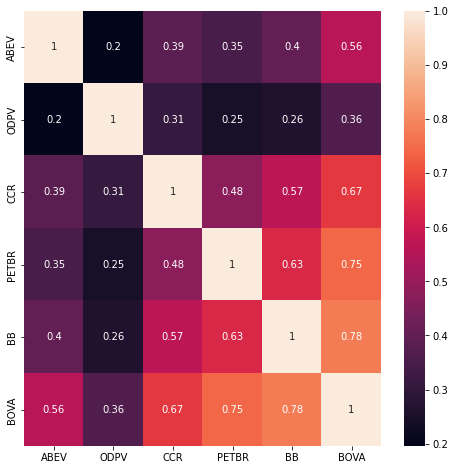

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

Risco do portfólio

In [14]:
# Definindo os pesos 

pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [15]:
taxas_retorno.cov() * 246

,ABEV,ODPV,CCR,PETBR,BB,BOVA
ABEV,0.074865,0.016818,0.043085,0.048871,0.047922,0.039431
ODPV,0.016818,0.098379,0.039800,0.039210,0.036010,0.029186
CCR,0.043085,0.039800,0.165272,0.098747,0.100460,0.069564
PETBR,0.048871,0.039210,0.098747,0.256882,0.139730,0.096918
BB,0.047922,0.036010,0.100460,0.139730,0.188922,0.086956
BOVA,0.039431,0.029186,0.069564,0.096918,0.086956,0.065802


In [16]:
np.dot(taxas_retorno.cov() * 246, pesos1)

array([0.04631217, 0.04604341, 0.08947284, 0.11668797, 0.10260912,
       0.06441087])

Variancia portfólio

In [17]:
var_portfolio = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
var_portfolio

0.08022510172161985